## Cifar 10 dataset - CNN to classify color images into 10 categories (with feed forward)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras import Sequential, datasets 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


2024-05-13 22:13:25.742320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load dataset

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape
y_train.shape
#X_test.shape

(50000, 1)

In [4]:
y_train = y_train.flatten()

In [5]:
y_train.shape

(50000,)

### Specify the classes

In [6]:
y_classes = ['airplanes','automobiles','bird','cat','deer','dog','frog','horse','ship','truck']

len(y_classes)

10

In [7]:

# Displays image with label

def showImage(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(y_classes[y[index]])
    plt.show()

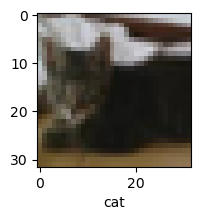

In [8]:
showImage(X_train,y_train,9)

In [9]:
#Need to normalize the data - helps the training

X_train = X_train / 255 # broadcast division
X_test = X_test / 255 

X_train[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Build the model

In [10]:
## Build the model

model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3), activation = "relu", input_shape = (32,32,3)),
    MaxPooling2D(pool_size=(2,2)), #reduces the computation required by taking a 2,2 matrix and pcking the max value
    Conv2D(filters=64, kernel_size=(4,4), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=34, activation="relu"),
    Dense(units=10, activation="softmax")
])



In [11]:
## Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 34)                7

In [12]:
# Train the model

history_lr = model.fit(X_train, y_train, validation_split=0.2, epochs=3)

Epoch 1/3
1250/1250 [==============================] - 33s 25ms/step - loss: 1.5947 - accuracy: 0.4192 - val_loss: 1.3547 - val_accuracy: 0.5177
Epoch 2/3
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2262 - accuracy: 0.5649 - val_loss: 1.1612 - val_accuracy: 0.5883
Epoch 3/3
1250/1250 [==============================] - 31s 24ms/step - loss: 1.0688 - accuracy: 0.6275 - val_loss: 1.0659 - val_accuracy: 0.6317


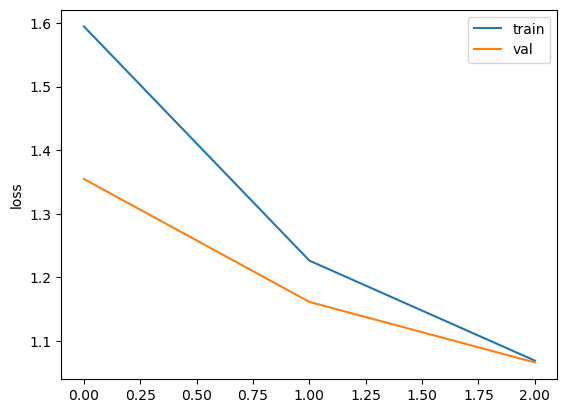

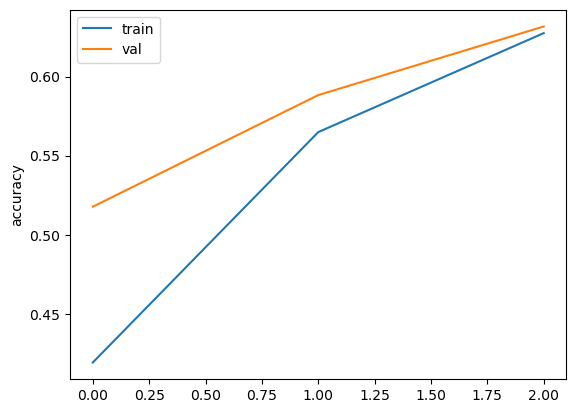

In [13]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')

plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()



In [14]:

y_predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [15]:
y_predction_args = [np.argmax(arr) for arr in y_predictions]

In [16]:
y_test = y_test.flatten()

## Check some predictions! 

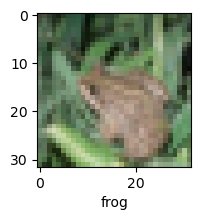

frog


In [17]:
showImage(X_test, y_test, 4)
print(y_classes[y_predction_args[4]])

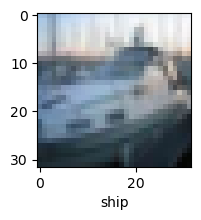

Prediction: ship


In [18]:
showImage(X_test, y_test, 2)
print("Prediction:", y_classes[y_predction_args[2]])

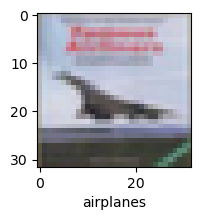

Prediction: ship


In [19]:
showImage(X_test, y_test, 3)
print("Prediction:", y_classes[y_predction_args[3]])

## Evaluate Model

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0641 - accuracy: 0.6250


[1.064100980758667, 0.625]

In [21]:
from sklearn.metrics import classification_report


In [22]:
print(classification_report(y_test, y_predction_args))

              precision    recall  f1-score   support

           0       0.76      0.47      0.58      1000
           1       0.79      0.74      0.76      1000
           2       0.59      0.42      0.49      1000
           3       0.40      0.57      0.47      1000
           4       0.64      0.51      0.57      1000
           5       0.51      0.54      0.52      1000
           6       0.77      0.69      0.73      1000
           7       0.67      0.74      0.70      1000
           8       0.57      0.87      0.69      1000
           9       0.75      0.69      0.72      1000

    accuracy                           0.62     10000
   macro avg       0.65      0.62      0.62     10000
weighted avg       0.65      0.62      0.62     10000



The F1 score is of importance. 
